# Multilayer Perceptron

## Step Function

In [60]:
def step(x):
    if x > 0:
        return 1
    else:
        return 0

Let's test this `step`.

In [61]:
step(-200)

0

In [7]:
inputs = [1, 200, -2, 0, 500]

In [62]:
for input in inputs:
    print(f'input is {input}, and output of step is {step(input)}')

input is 1, and output of step is 1
input is 200, and output of step is 1
input is -2, and output of step is 0
input is 0, and output of step is 0
input is 500, and output of step is 1


Let's improve `step` to process multiple items using `numpy`.

Let's practice numpy before we implement a new `step` function.

In [9]:
import numpy as np

In [11]:
x = np.array([1, 200, -2, 0, 500])
x > 0

array([ True,  True, False, False,  True])

In [12]:
(x > 0).astype(int)

array([1, 1, 0, 0, 1])

In [63]:
# step_function numpy version
def step(x):
    return (x > 0).astype(int)

In [64]:
step(x)

array([1, 1])

Let's plot `step`. If you don't have `matplotlib` yet, install it from `pypi.org' or `anaconda.org`.

In [18]:
import matplotlib.pyplot as plt

In [65]:
x = np.arange(-10.0, 10.0, 0.1)
y = step(x)

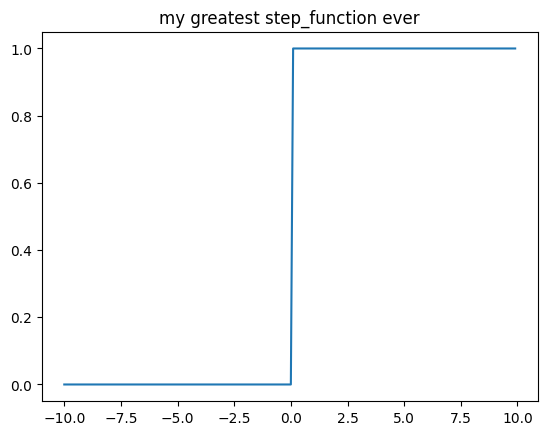

In [24]:
plt.plot(x, y)
plt.title('my greatest step_function ever')
plt.show()

## Sigmoid Function

In [31]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

Let's plot `sigmoid` to see if the function is properly written.

In [32]:
y = sigmoid(x)

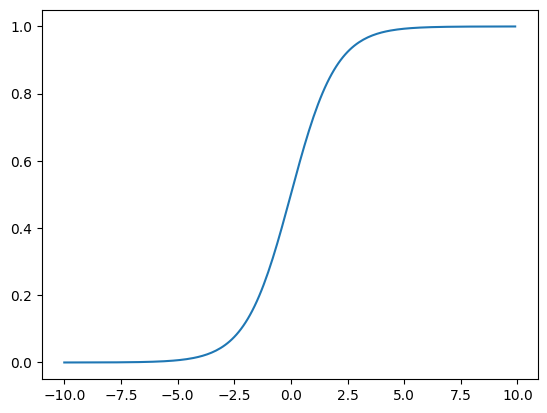

In [33]:
plt.plot(x, y)
plt.show()

## Multi-dimensional Array

In [35]:
w = np.array([ [1, 3, 5], [2, 4, 6 ]])

In [38]:
x = np.array([10, 20])

In [39]:
x * w

ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

In [41]:
y = np.dot(x ,w)

In [42]:
x.shape

(2,)

In [45]:
w.shape

(2, 3)

## Multi-layer Perceptron

In [70]:
#x = np.array([7.0, 2.0])
x = np.array([1.3, 3.141592])


In [71]:
w1 = np.array([[0.7, 0.9, 0.3],[0.5, 0.4, 0.1]])

In [72]:
b1 = np.array([1, 1, 1])

In [73]:
a1 = np.dot(x, w1) + b1

In [74]:
a1

array([3.480796 , 3.4266368, 1.7041592])

In [75]:
z1 = sigmoid(a1)

In [76]:
z1

array([0.97013639, 0.96852671, 0.84607717])

In [77]:
w2 = np.array([ [0.2, 0.3], [0.4, 0.5], [0.22, 0.1234] ])

In [78]:
b2 = np.array([0.5, 0.5])

In [79]:
a2 = np.dot(z1, w2) + b2

In [80]:
a2

array([1.26757494, 1.37971019])

In [81]:
z2 = sigmoid(a2)

In [82]:
z2

array([0.78032733, 0.79894445])

In [83]:
def identity(x):
    return x

In [84]:
w3 = np.array([ [0.7, 0.1], [0.123, 0.314] ])

In [89]:
b3 = np.array([0.1, 0.2])

In [90]:
a3 = np.dot(z2, w3) + b3

In [86]:
z3 = identity(a3)

In [87]:
z3

array([0.6444993 , 0.32890129])

### Make some fucntions to do MLP more easily

In [94]:
def init_network():
    net = {}
    # layer 1
    net['w1'] = np.array([[0.7, 0.9, 0.3],[0.5, 0.4, 0.1]])
    net['b1'] = np.array([1, 1, 1])
    # layer 2
    net['w2'] = np.array([ [0.2, 0.3], [0.4, 0.5], [0.22, 0.1234] ])
    net['b2'] = np.array([0.5, 0.5])
    # layer 3 <-- output
    net['w3'] = np.array([ [0.7, 0.1], [0.123, 0.314] ])
    net['b3'] = np.array([0.1, 0.2])

    return net

def forward(net, x):
    w1, w2, w3 = net['w1'], net['w2'], net['w3']
    b1, b2, b3 = net['b1'], net['b2'], net['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3
    y = identity(a3)

    return y





In [96]:
net = init_network()
y = forward(net, np.array([7.0, 2.0]))

In [97]:
y

array([0.75050477, 0.53158747])

## MultiLayerPerceptron class

In [99]:
class MultiLayerPerceptron:
    def __init__(self):
        self.net = {}
        pass

    def init_network(self):
        net = {}
        # layer 1
        net['w1'] = np.array([[0.7, 0.9, 0.3],[0.5, 0.4, 0.1]])
        net['b1'] = np.array([1, 1, 1])
        # layer 2
        net['w2'] = np.array([ [0.2, 0.3], [0.4, 0.5], [0.22, 0.1234] ])
        net['b2'] = np.array([0.5, 0.5])
        # layer 3 <-- output
        net['w3'] = np.array([ [0.7, 0.1], [0.123, 0.314] ])
        net['b3'] = np.array([0.1, 0.2])

        self.net = net

    def forward(self, x):
        w1, w2, w3 = self.net['w1'], self.net['w2'], self.net['w3']
        b1, b2, b3 = self.net['b1'], self.net['b2'], self.net['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.identity(a3)

        return y
    
    def identity(self, x):
        return x
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

Let's try to use the class!

In [100]:
mlp = MultiLayerPerceptron()
mlp.init_network()
y = mlp.forward(np.array([7.0, 2.0]))

In [101]:
y

array([0.75050477, 0.53158747])